# Importing and def

In [1]:
import math
import sympy 
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

x,y,z=sympy.symbols('x y z')


def g1(x,y,z):
    return 3*x - sympy.cos(y*z) - 0.5 

def g2(x,y,z):
    return (x**2) - 81*(y + 0.1)**2 + sympy.sin(z) + 1.06

def g3(x,y,z):
    return sympy.exp(-x*y) + 20*z + (10*sympy.pi - 3)/3

def f(x,y,z):
    return 0.5*(g1(x,y,z)**2) + 0.5*(g2(x,y,z)**2) + 0.5*(g3(x,y,z)**2)

def df(x,y,z):
    
    return [sympy.diff(f(x,y,z),x),sympy.diff(f(x,y,z),y),sympy.diff(f(x,y,z),z)]  

def d2f(x,y,z):
    return [[sympy.diff(df(x,y,z)[0],x),sympy.diff(df(x,y,z)[0],y),sympy.diff(df(x,y,z)[0],z)],
    [sympy.diff(df(x,y,z)[1],x),sympy.diff(df(x,y,z)[1],y),sympy.diff(df(x,y,z)[1],z)],
    [sympy.diff(df(x,y,z)[2],x),sympy.diff(df(x,y,z)[2],y),sympy.diff(df(x,y,z)[2],z)]]

function=f(x,y,z)
gradient=df(x,y,z)
hessian=d2f(x,y,z)


# Initialization

In [2]:
eta=0.004
sigma=0.000001
x_initial=0
y_initial=0
z_initial=0

# Gradient descent

In [ ]:
def gradient_descent(x_initial,y_initial,z_initial,eta,sigma):
    a=x_initial
    b=y_initial
    c=z_initial  
    f_list=[]
    f_list.append(function.evalf(subs={x:a,y:b,z:c}))
    for i in range(1000):
        print('Iteration =', i, ' x =', [a,b,c], ' f(x) =', function.evalf(subs={x:a,y:b,z:c}))
        a=(a-eta*gradient[0].evalf(subs={x:a,y:b,z:c}))
        b=(b-eta*gradient[1].evalf(subs={x:a,y:b,z:c}))
        c=(c-eta*gradient[2].evalf(subs={x:a,y:b,z:c}))
        f_list.append(function.evalf(subs={x:a,y:b,z:c}))
        if abs(gradient[0].evalf(subs={x:a,y:b,z:c}))<sigma and abs(gradient[1].evalf(subs={x:a,y:b,z:c}))<sigma and abs(gradient[2].evalf(subs={x:a,y:b,z:c}))<sigma:
            break
    return f_list

localmin_f=gradient_descent(x_initial,y_initial,z_initial,eta,sigma)

plt.plot(localmin_f)
plt.ylabel('F(x)')
plt.xlabel('Iteration')
plt.title('Gradient Descent')
plt.show()


# Newton method

In [ ]:
def newton_method(x_initial,y_initial,z_initial,sigma):
    abc=np.reshape([x_initial,y_initial,z_initial],(3,))
    list=[]
    f_list=[]
    list.append(abc)
    f_list.append(function.evalf(subs={x:abc[0],y:abc[1],z:abc[2]}))
    for i in range(8):
        print('Iteration =', i, ' x =', abc, ' f(x) =', function.evalf(subs={x:abc[0],y:abc[1],z:abc[2]}))
        grad1=gradient[0].evalf(subs={x:abc[0],y:abc[1],z:abc[2]})
        grad2=gradient[1].evalf(subs={x:abc[0],y:abc[1],z:abc[2]})
        grad3=gradient[2].evalf(subs={x:abc[0],y:abc[1],z:abc[2]})
        grad=np.reshape([grad1,grad2,grad3],(3,))

        hess1=hessian[0][0].evalf(subs={x:abc[0],y:abc[1],z:abc[2]})
        hess2=hessian[0][1].evalf(subs={x:abc[0],y:abc[1],z:abc[2]})
        hess3=hessian[0][2].evalf(subs={x:abc[0],y:abc[1],z:abc[2]})
        hess4=hessian[1][0].evalf(subs={x:abc[0],y:abc[1],z:abc[2]})
        hess5=hessian[1][1].evalf(subs={x:abc[0],y:abc[1],z:abc[2]})
        hess6=hessian[1][2].evalf(subs={x:abc[0],y:abc[1],z:abc[2]})
        hess7=hessian[2][0].evalf(subs={x:abc[0],y:abc[1],z:abc[2]})
        hess8=hessian[2][1].evalf(subs={x:abc[0],y:abc[1],z:abc[2]})
        hess9=hessian[2][2].evalf(subs={x:abc[0],y:abc[1],z:abc[2]})
        hess=np.array([[hess1,hess2,hess3],[hess4,hess5,hess6],[hess7,hess8,hess9]],dtype=np.float64)

        hess_inv=np.linalg.inv((hess))
        learning_rate=np.reshape(hess_inv@grad,(3,))
        abc=np.array(np.reshape(abc,(3,)),dtype=np.float64)-learning_rate
        list.append(np.array(abc,dtype=np.float64))
        f_list.append(function.evalf(subs={x:abc[0],y:abc[1],z:abc[2]}))
        if abs(grad1)<sigma and abs(grad2)<sigma and abs(grad3)<sigma:
            break
    return f_list

Localmin_f=newton_method(x_initial,y_initial,z_initial,sigma)
plt.plot(Localmin_f)
plt.ylabel('F(x)')
plt.xlabel('Iteration')
plt.title('Newton Method')
plt.show()

# Steepest descent

In [ ]:
s=sympy.symbols('s')
initial_lambda=0
def steepest_descent(x_initial,y_initial,z_initial,initial_lambda,eta,sigma):
    a=x_initial
    b=y_initial
    c=z_initial
    Lambda=initial_lambda
    lambda_list=[]
    f_list=[]
    lambda_list.append(Lambda)
    f_list.append(function.evalf(subs={x:a,y:b,z:c}))
    print('Iteration =', 0, ' x =', [a,b,c], ' f(x) =',function.evalf(subs={x:a,y:b,z:c}))
    for i in range(100):

        a=a-(s*gradient[0].evalf(subs={x:a,y:b,z:c}))
        b=b-(s*gradient[1].evalf(subs={x:a,y:b,z:c}))
        c=c-(s*gradient[2].evalf(subs={x:a,y:b,z:c}))
        steepest_function=function.subs({x:a,y:b,z:c})

        steepest_function_lambdify=sympy.lambdify(s, steepest_function, 'scipy')
        local_min=opt.minimize_scalar(steepest_function_lambdify , method='Brent')
        Lambda=local_min.x
        lambda_list.append(Lambda)
        a=a.evalf(subs={s:Lambda})
        b=b.evalf(subs={s:Lambda})
        c=c.evalf(subs={s:Lambda})

        f_list.append(function.evalf(subs={x:a,y:b,z:c}))
        print('Iteration =', i+1, ' x =', [a,b,c], ' f(x) =',function.evalf(subs={x:a,y:b,z:c}))
        if abs(gradient[0].evalf(subs={x:a,y:b,z:c}))<sigma and abs(gradient[1].evalf(subs={x:a,y:b,z:c}))<sigma and abs(gradient[2].evalf(subs={x:a,y:b,z:c}))<sigma:
            break
    return f_list

s_f=steepest_descent(x_initial,y_initial,z_initial,initial_lambda,eta,sigma)
plt.plot(s_f)
plt.ylabel('F(x)')
plt.xlabel('Iteration')
plt.title('Steepest Descent')
plt.show()

# Comparison

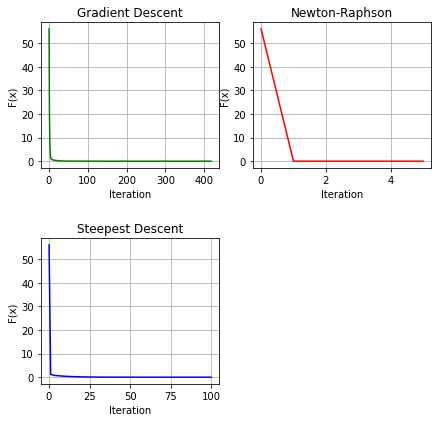

In [6]:
figure, axis = plt.subplots(2, 2)
  
# For gradiant decent Function
axis[0, 0].plot(localmin_f, color='green')
axis[0, 0].grid(True)
axis[0, 0].set_title("Gradient Descent")
axis[0, 0].set_xlabel("Iteration")
axis[0, 0].set_ylabel("F(x)")
  
# For newton raphson Function
axis[0, 1].plot(Localmin_f, color='red')
axis[0, 1].grid(True)
axis[0, 1].set_title("Newton-Raphson")
axis[0, 1].set_xlabel("Iteration")
axis[0, 1].set_ylabel("F(x)")
  
# For Tangent Function
axis[1, 0].plot(s_f, color='blue')
axis[1, 0].grid(True)
axis[1, 0].set_title("Steepest Descent")
axis[1, 0].set_xlabel("Iteration")
axis[1, 0].set_ylabel("F(x)")
figure.tight_layout(pad=0.0)
figure.set_size_inches(6, 6)
figure.delaxes(axis[1,1])
plt.show()

# Repeating all three methods with 100 different initial points 

In [ ]:
for i in range(100):
    initial_matrix=np.random.rand(3)
    localmin_f=gradient_descent(initial_matrix[0],initial_matrix[1],initial_matrix[2],eta,sigma)
    Localmin_f=newton_method(initial_matrix[0],initial_matrix[1],initial_matrix[2],sigma)
    s_f=steepest_descent(initial_matrix[0],initial_matrix[1],initial_matrix[2],initial_lambda,eta,sigma)